In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
from PIL import Image

In [2]:
#load chelsea's data since january and filter progressive passes of the desired player
dfchels = pd.read_csv(r'https://raw.githubusercontent.com/clxrse/match_data/main/Chelsea%20FC/20-21%20since%20jan/combineddatachels.csv')
playerNameChels = input("Enter player Name(please use accented characters where needed:")
team = input("Enter Player's team name:")
typew = "{'value': 1, 'displayName': 'Successful'}"
dfchels = dfchels.loc[(dfchels.playerName==playerNameChels) & (dfchels.outcomeType == typew),
                 ['x', 'y', 'endX', 'endY']]
import numpy as np
dfchels['x'] = dfchels['x']*1.05
dfchels['endX'] =dfchels['endX']*1.05
dfchels['y']=dfchels['y']*0.68
dfchels['endY']=dfchels['endY']*0.68
dfchels['dist1']=np.sqrt((105-dfchels.x)**2 + (34-dfchels.y)**2)
dfchels['dist2']=np.sqrt((105-dfchels.endX)**2 + (34-dfchels.endY)**2)
dfchels['distdiff'] = dfchels['dist1']-dfchels['dist2']
passAc = dfchels.query("(x<52.5)&(endX<52.5)&(distdiff>=30)")
passBc = dfchels.query("(x<52.5)&(endX>52.5)&(distdiff>=15)")
passCc = dfchels.query("(x>52.5)&(endX>52.5)&(distdiff>=10)")
passAc = passAc.append(passBc)
passAc = passAc.append(passCc)

/home/keratinised/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (32,33,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#check total successful prog passes
len(passAc.index)

77

In [4]:
#load arsenal's data since january and filter progressive passes of the desired player
dfassna = pd.read_csv(r'https://raw.githubusercontent.com/clxrse/match_data/main/Arsenal/20-21-fewmatches/combineddataassna.csv')
playerNameAssna = input("Enter player Name(please use accented characters where needed:")
team = input("Enter Player's team name:")
typew = "{'value': 1, 'displayName': 'Successful'}"
dfassna = dfassna.loc[(dfassna.playerName==playerNameAssna) & (dfassna.outcomeType == typew),
                 ['x', 'y', 'endX', 'endY']]
import numpy as np
dfassna['x'] = dfassna['x']*1.05
dfassna['endX'] =dfassna['endX']*1.05
dfassna['y']=dfassna['y']*0.68
dfassna['endY']=dfassna['endY']*0.68
dfassna['dist1']=np.sqrt((105-dfassna.x)**2 + (34-dfassna.y)**2)
dfassna['dist2']=np.sqrt((105-dfassna.endX)**2 + (34-dfassna.endY)**2)
dfassna['distdiff'] = dfassna['dist1']-dfassna['dist2']
passAa = dfassna.query("(x<52.5)&(endX<52.5)&(distdiff>=30)")
passBa = dfassna.query("(x<52.5)&(endX>52.5)&(distdiff>=15)")
passCa = dfassna.query("(x>52.5)&(endX>52.5)&(distdiff>=10)")
passAa = passAa.append(passBa)
passAa = passAa.append(passCa)

/home/keratinised/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (27,29,30,32,33,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
len(passAa.index)

121

In [6]:
#Loading Some Fonts
URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
URL3 = "https://github.com/clxrse/open_mod/blob/main/Oxygen/Oxygen-Bold.ttf?raw=true"
font_regular = FontManager(URL2)
font_bold = FontManager(URL)
font_label = FontManager(URL3)

In [7]:
#load some images
arrowurl = "https://raw.githubusercontent.com/clxrse/open_mod/main/straightarrow.png"
arrow_url = arrowurl
arrow = Image.open(urlopen(arrow_url))

LEAGUE_LOGO = "https://raw.githubusercontent.com/clxrse/FONTS/main/Premier_League-Logo.wine.png"
league_logo = Image.open(urlopen(LEAGUE_LOGO))

In [8]:
#Make a custom cmap (use a color of your choice here I have chosen #e1e5e8 as pitch color and #e81a2b(red) and #477acc (blue) as cmap colors)
pitch_color = input("Enter a color(hex):")
cmap_color1 = input("enter cmap color(hex) for arsenal:")
cmap_color2 = input("Enter cmap color(hex) for chelsea")
cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

In [9]:
#set up the pitch
pitch = VerticalPitch(pitch_type ='uefa',line_zorder=2,line_color='#525252',pitch_color=pitch_color,goal_type="box")

In [10]:
your_username = input("Enter your username/name:")

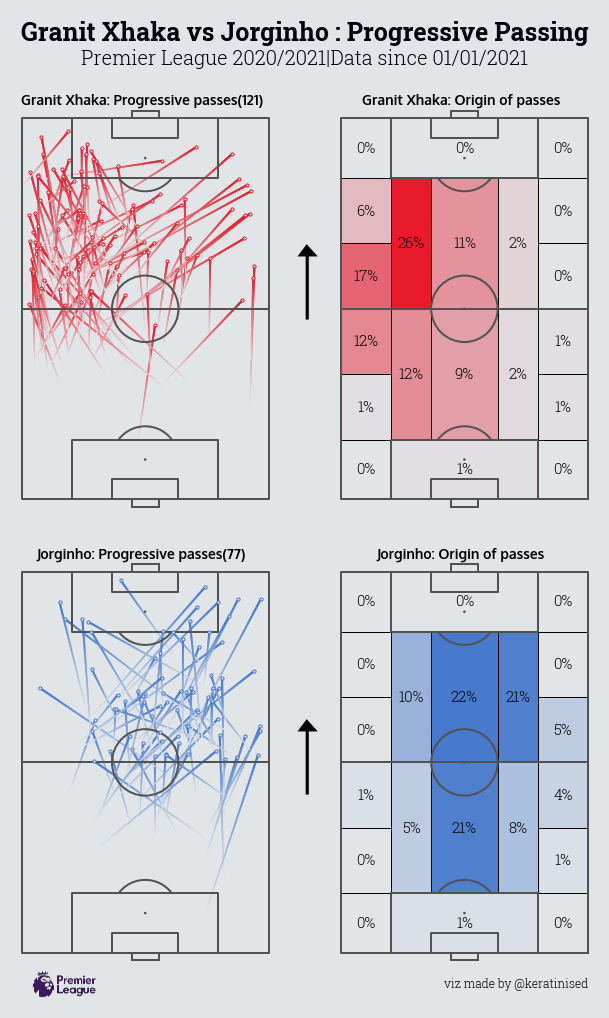

In [11]:
fig, axs = pitch.grid(nrows=2, ncols=2, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

fig.set_facecolor(pitch_color)

#plot for xhaka


Lines = pitch.lines(xstart=passAa.x,ystart=passAa.y,xend=passAa.endX,yend=passAa.endY,cmap=cmapA,comet=True,lw=2,ax=axs['pitch'][0,0])
scatter = pitch.scatter(passAa.endX,passAa.endY,color=pitch_color,ax=axs['pitch'][0,0],zorder=3,ec="#e81a2b",lw=1,s=10)

bin_statistic = pitch.bin_statistic_positional(passAa.x, passAa.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic, ax=axs['pitch'][0,1],
                         cmap=cmapA, edgecolors='#000000')

labels = pitch.label_heatmap(bin_statistic, color='black', fontsize=15,
                             ax=axs['pitch'][0,1], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular.prop)


#plot for jorginho


Lines2 = pitch.lines(xstart=passAc.x,ystart=passAc.y,xend=passAc.endX,yend=passAc.endY,cmap=cmapB,comet=True,lw=2,ax=axs['pitch'][1,0])
scatter2 = pitch.scatter(passAc.endX,passAc.endY,color=pitch_color,ax=axs['pitch'][1,0],zorder=3,ec="#477acc",lw=1,s=10)

bin_statistic2 = pitch.bin_statistic_positional(passAc.x, passAc.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic2, ax=axs['pitch'][1,1],
                         cmap=cmapB, edgecolors='#000000')

labels2 = pitch.label_heatmap(bin_statistic2, color='black', fontsize=15,
                             ax=axs['pitch'][1,1], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular.prop)


from highlight_text import ax_text

axs['title'].text(0.5, 0.7,  f'{playerNameAssna} vs {playerNameChels} : Progressive Passing', color='#000009',va='center', ha='center', fontproperties=font_bold.prop, fontsize=25)


axs['title'].text(0.5, 0.4, 'Premier League 2020/2021|Data since 01/01/2021', color='#000009',va='center', ha='center', fontproperties=font_regular.prop, fontsize=20)

axs['pitch'][0,0].text(35,110,'Granit Xhaka: Progressive passes(121)',color = "black",va='center',ha='center',fontproperties=font_label.prop,fontsize=14)

axs['pitch'][0,1].text(35,110,'Granit Xhaka: Origin of passes',color = "black",va='center',ha='center',fontproperties=font_label.prop,fontsize=14)

axs['pitch'][1,0].text(35,110,'Jorginho: Progressive passes(77)',color = "black",va='center',ha='center',fontproperties=font_label.prop,fontsize=14)

axs['pitch'][1,1].text(35,110,'Jorginho: Origin of passes',color = "black",va='center',ha='center',fontproperties=font_label.prop,fontsize=14)

axs['endnote'].text(1, 0.5, "viz made by @keratinised", va='center', ha='right', fontsize=12,fontproperties=font_regular.prop,color='black')

ax_logo = add_image(league_logo, fig,left=0.05,bottom=0.03,height=0.05)
ax_arrow = add_image(arrow, fig,left=0.488,bottom=0.67,height=0.07)
ax_arrow2 = add_image(arrow, fig,left=0.488,bottom=0.23,height=0.07)
plt.savefig("XhakavJorginho.png",dpi=500)